# Question 1: XOR Gate *Implementation*

## Truth table for XOR Gate.

In [ ]:
import pandas as pd
import numpy as np


data = {
    'Input A': [0, 0, 1, 1],
    'Input B': [0, 1, 0, 1],
    'Output (A XOR B)': [0, 1, 1, 0]
}

xor_truth_table = pd.DataFrame(data)

print(xor_truth_table)


   Input A  Input B  Output (A XOR B)
0        0        0                 0
1        0        1                 1
2        1        0                 1
3        1        1                 0


## MCP (McCulloch Pitts) Neuron.

In [ ]:
# McCulloch-Pitts Neuron Class
class McCullochPittsNeuron:
    def __init__(self):
        self.weights = np.random.rand(2)  # Random weights for two inputs
        self.bias = np.random.rand(1)  # Random bias

    def step_function(self, x):
        """Step activation function"""
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        """Predict the output for given inputs"""
        total_input = np.dot(inputs, self.weights) + self.bias
        return self.step_function(total_input)

    def train(self, training_data, learning_rate=0.1, epochs=100):
        """Train the neuron using the provided dataset"""
        for _ in range(epochs):
            for index, row in training_data.iterrows():
                inputs = np.array([row['Input A'], row['Input B']])
                target = row['Output (A XOR B)']

                # Predict output
                prediction = self.predict(inputs)

                # Update weights and bias if there's an error
                error = target - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

# Create the neuron
neuron = McCullochPittsNeuron()

# Train the neuron
neuron.train(xor_truth_table)

# Testing the trained model
print("Trained Weights:", neuron.weights)
print("Trained Bias:", neuron.bias)
print("\nTesting XOR inputs:")
for index, row in xor_truth_table.iterrows():
    inputs = np.array([row['Input A'], row['Input B']])
    print(f"Input: {inputs} => Predicted Output: {neuron.predict(inputs)}")


Trained Weights: [-0.18800659 -0.04802441]
Trained Bias: [0.09225096]

Testing XOR inputs:
Input: [0 0] => Predicted Output: 1
Input: [0 1] => Predicted Output: 1
Input: [1 0] => Predicted Output: 0
Input: [1 1] => Predicted Output: 0


### Observations with MCP

#### Observations Under McCulloch-Pitts Neuron (MCP)

- **Model Limitations**: The McCulloch-Pitts neuron model has limitations that prevent it from solving the XOR problem.
  
- **Non-linearly Separable Data**: The XOR function outputs `1` only when one of the two inputs is `1`, which results in points that cannot be separated by a single line in a graph.

- **Incorrect Predictions**: Due to its reliance on a step activation function and a single layer of weights, the MCP model fails to give correct predictions for the XOR function.

- **Implication for Neural Network Development**: The limitations of the MCP model signifies the importance of having Multi Layered Perceptrons.

## MLP (Multi Layer Perceptron)

In [ ]:
import numpy as np

def activation_derivative(value):
    return value * (1 - value)

def activation_function(value):
    return 1 / (1 + np.exp(-value))

# Define the XOR input and output datasets
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output_data = np.array([[0], [1], [1], [0]])

# Set a seed for reproducibility
np.random.seed(42)

# Define the architecture of the neural network
num_inputs = 2
num_hidden = 2
num_outputs = 1

# Initialize weights randomly
weights_input_hidden = np.random.rand(num_inputs, num_hidden)
weights_hidden_output = np.random.rand(num_hidden, num_outputs)

# Define training parameters
learning_rate = 0.1
num_epochs = 10000
loss_history = []

# Train the Multi-Layer Perceptron
for epoch in range(num_epochs):
    # Forward propagation
    hidden_input = np.dot(input_data, weights_input_hidden)
    hidden_output = activation_function(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output)
    predicted_output = activation_function(final_input)

    # Backward propagation
    error = output_data - predicted_output
    delta_output = error * activation_derivative(predicted_output)

    hidden_error = delta_output.dot(weights_hidden_output.T)
    delta_hidden = hidden_error * activation_derivative(hidden_output)

    # Update weights
    weights_hidden_output += hidden_output.T.dot(delta_output) * learning_rate
    weights_input_hidden += input_data.T.dot(delta_hidden) * learning_rate

    loss = np.mean(np.square(error))  # Mean Squared Error
    loss_history.append(loss)

# Display the final weights after training
print("Optimised weights - Input to Hidden:")
print(weights_input_hidden)
print("Optimised weights - Hidden to Output:")
print(weights_hidden_output)

# Evaluate the model with the input data
print("\nTesting the model:")
for i, sample in enumerate(input_data):
    hidden_input = np.dot(sample, weights_input_hidden)
    hidden_output = activation_function(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output)
    predicted_output = activation_function(final_input)

    print(f"Inputs: {sample}, Output Value: {np.round(predicted_output[0])}")


Optimised weights - Input to Hidden:
[[0.78576227 5.59864481]
 [0.78597603 5.6128331 ]]
Optimised weights - Hidden to Output:
[[-12.09636913]
 [  9.36939838]]

Testing the model:
Inputs: [0 0], Output Value: 0.0
Inputs: [0 1], Output Value: 1.0
Inputs: [1 0], Output Value: 1.0
Inputs: [1 1], Output Value: 0.0


### Visualisation

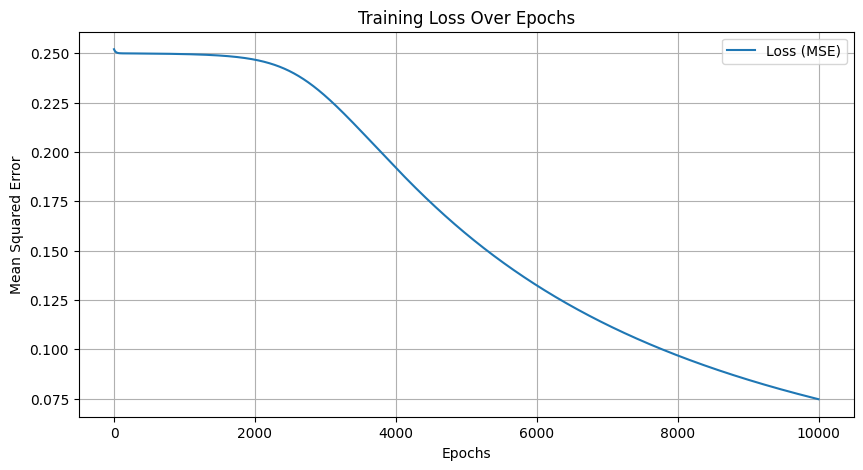

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss (MSE)')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# Visualization of Decision Boundary
def plot_decision_boundary(weights_input_hidden, weights_hidden_output):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.zeros(xx.shape)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            sample = np.array([[xx[i, j], yy[i, j]]])
            hidden_layer_input = np.dot(sample, weights_input_hidden)
            hidden_layer_output = activation_function(hidden_layer_input)
            final_input = np.dot(hidden_layer_output, weights_hidden_output)
            predicted_output = activation_function(final_input)
            Z[i, j] = predicted_output


# Question 2 A. Sentiment Analysis Twitter Airline

In [ ]:
import pandas as pd

df = pd.read_csv('Tweets.csv')
df = df[['text', 'airline_sentiment']]

# Preprocessing - Label encoding: positive as 1 and negative as 0
df['label'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])

X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)  # Set max length of tweet to 100 words
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_shape=(100,), activation=activation))  # First hidden layer
    model.add(Dense(8, activation=activation))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Create the model with desired activation function
model = create_model(activation='relu')

# Train the model with backpropagation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
366/366 [==============================] - 2s 2ms/step - loss: 3.0648 - accuracy: 0.7936 - val_loss: 0.7000 - val_accuracy: 0.8408
Epoch 2/10
366/366 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.8367 - val_loss: 0.5131 - val_accuracy: 0.8419
Epoch 3/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.8367 - val_loss: 0.5053 - val_accuracy: 0.8432
Epoch 4/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.8368 - val_loss: 0.4884 - val_accuracy: 0.8432
Epoch 5/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4534 - accuracy: 0.8372 - val_loss: 0.4879 - val_accuracy: 0.8432
Epoch 6/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8373 - val_loss: 0.4689 - val_accuracy: 0.8432
Epoch 7/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8374 - val_loss: 0.4586 - val_accuracy: 0.8432
Epoch 

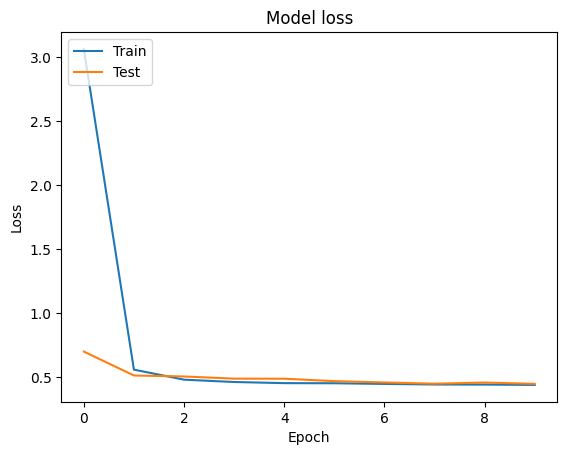

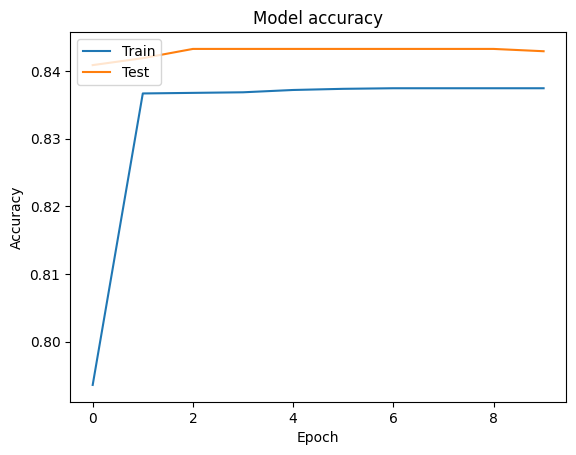

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Try sigmoid activation
model_sigmoid = create_model(activation='sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Try tanh activation
model_tanh = create_model(activation='tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
366/366 [==============================] - 1s 2ms/step - loss: 0.7292 - accuracy: 0.5633 - val_loss: 0.4953 - val_accuracy: 0.8432
Epoch 2/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.8374 - val_loss: 0.4453 - val_accuracy: 0.8432
Epoch 3/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8374 - val_loss: 0.4346 - val_accuracy: 0.8432
Epoch 4/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8374 - val_loss: 0.4290 - val_accuracy: 0.8432
Epoch 5/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8374 - val_loss: 0.4243 - val_accuracy: 0.8432
Epoch 6/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.8374 - val_loss: 0.4193 - val_accuracy: 0.8432
Epoch 7/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8374 - val_loss: 0.4155 - val_accuracy: 0.8432
Epoch 

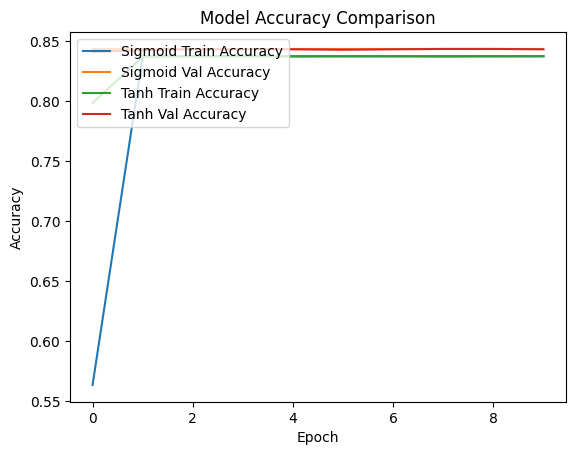

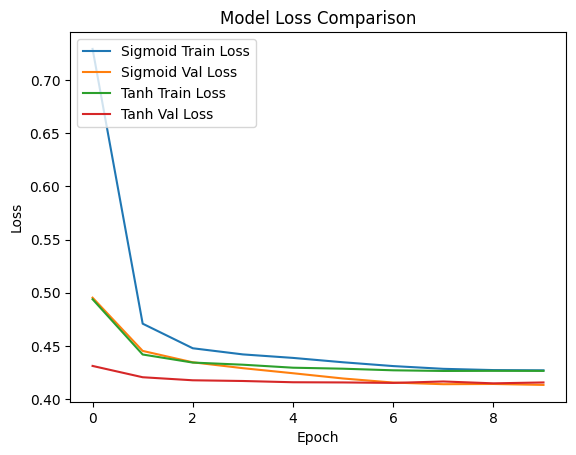

In [ ]:
# Plot sigmoid model loss and accuracy
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Val Accuracy')
plt.plot(history_tanh.history['accuracy'], label='Tanh Train Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Similarly, for loss
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Val Loss')
plt.plot(history_tanh.history['loss'], label='Tanh Train Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh Val Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


92/92 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8429
Test Accuracy: 0.8429


# Test

In [1]:
# Check if TPU is available
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()
    print("Running on CPU/GPU")

Running on TPU: 


Training with sigmoid activation:
Test accuracy: 0.7855
Training with relu activation:
Test accuracy: 0.7855
Training with tanh activation:
Test accuracy: 0.7855


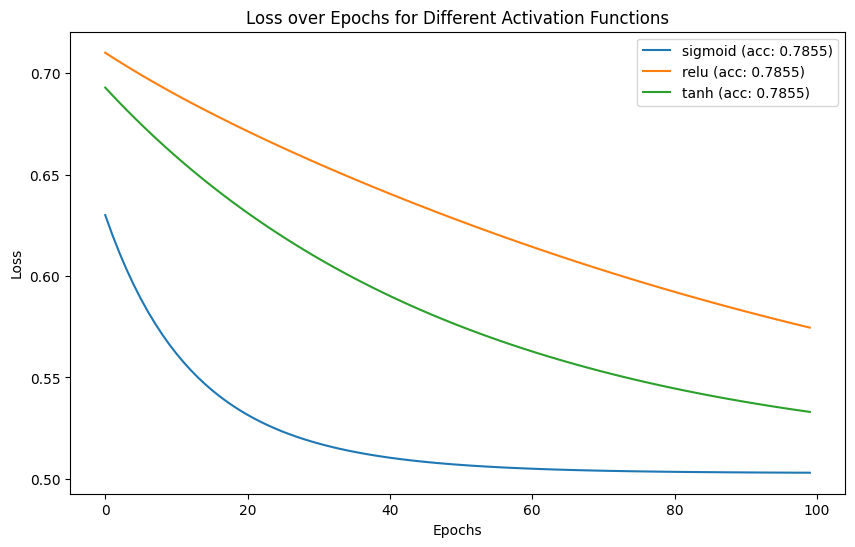

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Load and preprocess the data
data = pd.read_csv('Tweets.csv')
data = data.head(2000)[['airline_sentiment', 'text']]
data = data[data['airline_sentiment'] != 'neutral']  # Remove neutral sentiment for binary classification

# Encode labels
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['airline_sentiment'])

# Vectorize text
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()
y = data['sentiment'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'relu':
            self.activation = relu
        elif activation == 'tanh':
            self.activation = tanh
        else:
            raise ValueError("Unsupported activation function")

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]

        dZ2 = output - y.reshape(-1, 1)
        dW2 = (1 / m) * np.dot(self.a1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        if self.activation == sigmoid:
            dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        elif self.activation == relu:
            dZ1 = np.dot(dZ2, self.W2.T) * (self.z1 > 0)
        elif self.activation == tanh:
            dZ1 = np.dot(dZ2, self.W2.T) * (1 - np.power(self.a1, 2))

        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X, y, learning_rate, epochs):
        losses = []
        for _ in range(epochs):
            output = self.forward(X)
            loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
            losses.append(loss)

            dW1, db1, dW2, db2 = self.backward(X, y, output)

            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

        return losses

# Train and evaluate the model for each activation function
activations = ['sigmoid', 'relu', 'tanh']
results = {}

for activation in activations:
    print(f"Training with {activation} activation:")
    nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=64, output_size=1, activation=activation)
    losses = nn.train(X_train, y_train, learning_rate=0.01, epochs=100)

    y_pred = (nn.forward(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    results[activation] = {'losses': losses, 'accuracy': accuracy}

# Plot loss over epochs for each activation function
plt.figure(figsize=(10, 6))
for activation, data in results.items():
    plt.plot(data['losses'], label=f"{activation} (acc: {data['accuracy']:.4f})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Activation Functions')
plt.legend()
plt.show()